In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns 
import joblib
import streamlit as st

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [2]:
dataset = pd.read_csv("worker_safety_ergonomics_dataset.csv")

dataset

,Worker_ID,Age,Hours_Worked_Per_Day,Posture_Score,Movement_Frequency_Per_Hour,Breaks_Taken_Per_Day,Reported_Pain_Level,Ergonomic_Risk_Level
0,W001,54,8.9,1,46,5,4,Low
1,W002,57,9.8,2,17,3,4,Medium
2,W003,23,7.3,1,23,0,8,Low
3,W004,23,7.7,8,46,0,6,Medium
4,W005,36,6.0,8,34,0,4,Low
...,...,...,...,...,...,...,...,...
115,W116,46,4.4,7,18,1,4,Low
116,W117,26,8.0,4,19,2,4,Medium
117,W118,47,8.6,7,60,3,8,High
118,W119,52,4.6,4,55,5,6,Medium


In [3]:
dataset.head()

,Worker_ID,Age,Hours_Worked_Per_Day,Posture_Score,Movement_Frequency_Per_Hour,Breaks_Taken_Per_Day,Reported_Pain_Level,Ergonomic_Risk_Level
0,W001,54,8.9,1,46,5,4,Low
1,W002,57,9.8,2,17,3,4,Medium
2,W003,23,7.3,1,23,0,8,Low
3,W004,23,7.7,8,46,0,6,Medium
4,W005,36,6.0,8,34,0,4,Low


In [4]:
dataset.tail()

,Worker_ID,Age,Hours_Worked_Per_Day,Posture_Score,Movement_Frequency_Per_Hour,Breaks_Taken_Per_Day,Reported_Pain_Level,Ergonomic_Risk_Level
115,W116,46,4.4,7,18,1,4,Low
116,W117,26,8.0,4,19,2,4,Medium
117,W118,47,8.6,7,60,3,8,High
118,W119,52,4.6,4,55,5,6,Medium
119,W120,58,9.0,9,60,5,0,High


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Worker_ID                    120 non-null    object 
 1   Age                          120 non-null    int64  
 2   Hours_Worked_Per_Day         120 non-null    float64
 3   Posture_Score                120 non-null    int64  
 4   Movement_Frequency_Per_Hour  120 non-null    int64  
 5   Breaks_Taken_Per_Day         120 non-null    int64  
 6   Reported_Pain_Level          120 non-null    int64  
 7   Ergonomic_Risk_Level         120 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 7.6+ KB


In [6]:
dataset.describe()

,Age,Hours_Worked_Per_Day,Posture_Score,Movement_Frequency_Per_Hour,Breaks_Taken_Per_Day,Reported_Pain_Level
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,39.541667,7.121667,5.583333,32.366667,2.533333,4.816667
std,11.804355,1.773293,2.639657,16.329040,1.719553,3.122118
min,21.000000,4.100000,1.000000,5.000000,0.000000,0.000000
25%,28.000000,5.775000,3.000000,19.000000,1.000000,2.000000
50%,40.000000,7.150000,6.000000,30.500000,3.000000,5.000000
75%,50.000000,8.700000,8.000000,46.000000,4.000000,7.000000
max,60.000000,10.000000,10.000000,60.000000,5.000000,10.000000


In [7]:
dataset.shape

(120, 8)

In [8]:
dataset.isnull().sum()

Worker_ID                      0
Age                            0
Hours_Worked_Per_Day           0
Posture_Score                  0
Movement_Frequency_Per_Hour    0
Breaks_Taken_Per_Day           0
Reported_Pain_Level            0
Ergonomic_Risk_Level           0
dtype: int64

In [9]:
dataset.columns

Index(['Worker_ID', 'Age', 'Hours_Worked_Per_Day', 'Posture_Score',
       'Movement_Frequency_Per_Hour', 'Breaks_Taken_Per_Day',
       'Reported_Pain_Level', 'Ergonomic_Risk_Level'],
      dtype='object')

In [10]:
dataset.dtypes

Worker_ID                       object
Age                              int64
Hours_Worked_Per_Day           float64
Posture_Score                    int64
Movement_Frequency_Per_Hour      int64
Breaks_Taken_Per_Day             int64
Reported_Pain_Level              int64
Ergonomic_Risk_Level            object
dtype: object

In [11]:
class_counts = dataset['Posture_Score'].value_counts()
class_counts

Posture_Score
8     19
3     15
6     14
4     13
7     13
9     12
5     10
2     10
1      8
10     6
Name: count, dtype: int64

In [12]:
dataset['posture_label'] = dataset['Posture_Score'].apply(
    lambda x:1 if x<= 4 else 0
)

In [13]:
class_counts = dataset['posture_label'].value_counts()
class_counts

posture_label
0    74
1    46
Name: count, dtype: int64

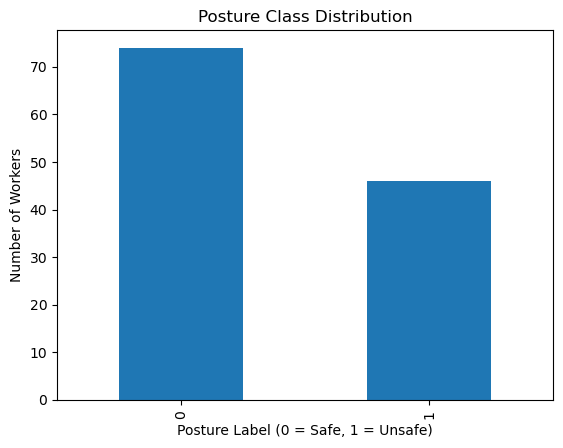

In [14]:
class_counts.plot(kind='bar')
plt.title("Posture Class Distribution")
plt.xlabel("Posture Label (0 = Safe, 1 = Unsafe)")
plt.ylabel("Number of Workers")
plt.show()

In [15]:
def classify_posture(score):
    if score <= 4:
        return "Unsafe"
    elif score <= 7:
        return "Moderate"
    else:
        return "Safe"

dataset['posture_class'] = dataset['Posture_Score'].apply(classify_posture)

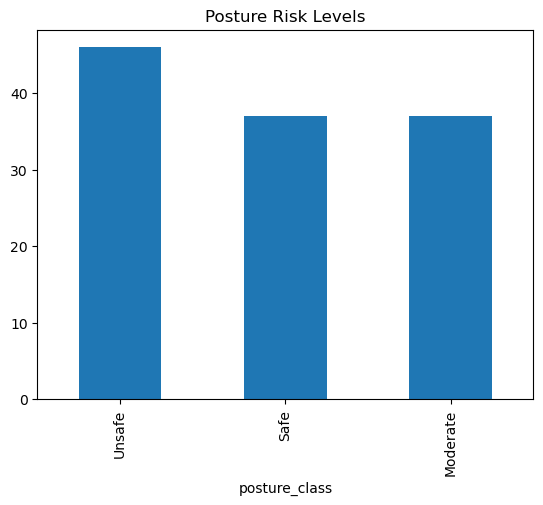

In [16]:
dataset['posture_class'].value_counts().plot(kind='bar')
plt.title("Posture Risk Levels")
plt.show()

In [17]:
y = dataset['posture_label']

In [18]:
X = dataset.drop(columns=[
    'Worker_ID',
    'Posture_Score',
    'posture_label'
])

X_encoded = pd.get_dummies(X, drop_first = True)

In [19]:
X.head()

,Age,Hours_Worked_Per_Day,Movement_Frequency_Per_Hour,Breaks_Taken_Per_Day,Reported_Pain_Level,Ergonomic_Risk_Level,posture_class
0,54,8.9,46,5,4,Low,Unsafe
1,57,9.8,17,3,4,Medium,Unsafe
2,23,7.3,23,0,8,Low,Unsafe
3,23,7.7,46,0,6,Medium,Safe
4,36,6.0,34,0,4,Low,Safe


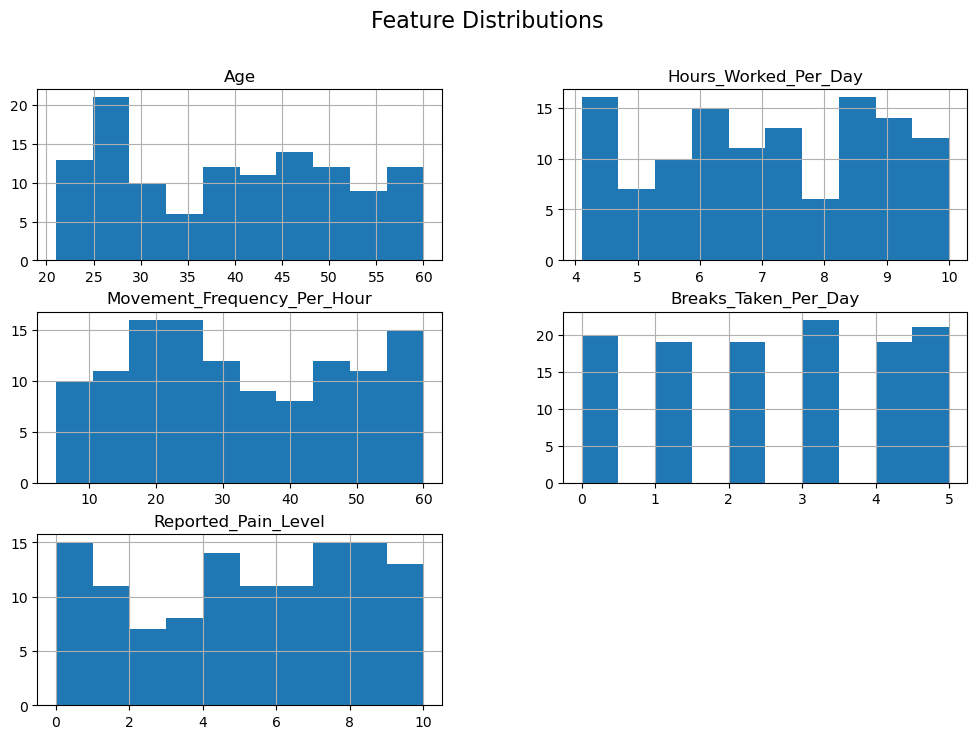

In [20]:
X.hist(figsize=(12, 8))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

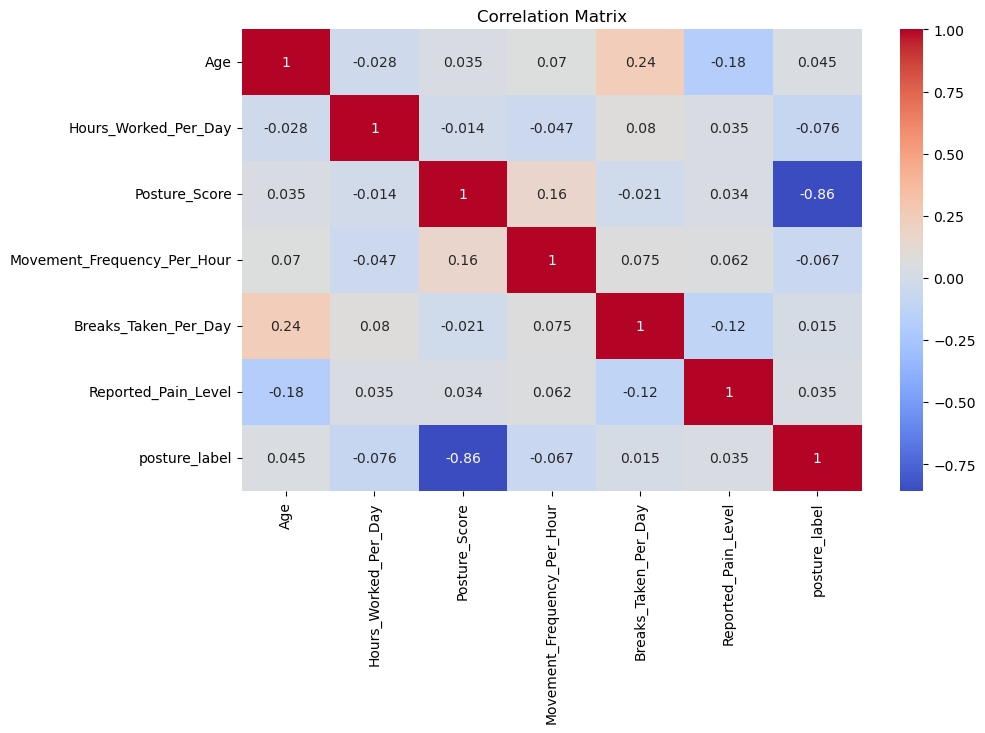

In [21]:
numeric_data = dataset.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [23]:
risk_map = {'Low': 1, 'Medium': 2, 'High': 3}
X['Ergonomic_Risk_Level'] = X['Ergonomic_Risk_Level'].map(risk_map)

In [24]:
X_train.select_dtypes(include = 'object').columns

Index([], dtype='object')

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

In [27]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         9

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [28]:
joblib.dump(model, "posture_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model & scaler saved ✅")

Model & scaler saved ✅


In [29]:
# Load the saved model & scaler
model = joblib.load("posture_model.pkl")
scaler = joblib.load("scaler.pkl")

# Example input (replace with your actual feature values)
sample_input = np.array([[5.2, 3.1, 1.5, 0.2, 2.0, 4.5, 3.3, 1.1, 0.9]])  # shape: [1, n_features]

# Scale the input if you used scaling
sample_input_scaled = scaler.transform(sample_input)

# Make prediction
prediction = model.predict(sample_input_scaled)
print("Prediction:", prediction)

Prediction: [1]


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [30]:
# Load the saved model & scaler
model = joblib.load("posture_model.pkl")
scaler = joblib.load("scaler.pkl")

# Example input (replace with your actual feature values)
sample_input = np.array([[0.1, 0.2, 0.1, 0.0, 0.2, 0.1, 0.0, 0.1, 0.0]])  # shape: [1, n_features]

# Scale the input if you used scaling
sample_input_scaled = scaler.transform(sample_input)

# Make prediction
prediction = model.predict(sample_input_scaled)
print("Prediction:", prediction)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: [0]
